### Getting Historical Data

In [450]:
import yfinance as yf

print('This only deals with stocks listed on NSE & NASDAQ \n')
stock=input('enter a valid stock name : ').strip()


def convert_stock_NS(stock_name):
    NSE_STOCK=f'{stock_name}.NS'
    return NSE_STOCK

ans=input('Is your stock listed on NSE (y/n) : ').strip().lower()
if ans=='y':
    stock=convert_stock_NS(stock)
    stock_data=yf.download(stock,period="5y")
else :
    stock_data=yf.download(stock,period="5y")    


This only deals with stocks listed on NSE & NASDAQ 



[*********************100%***********************]  1 of 1 completed


In [451]:
stock_ticker = yf.Ticker(stock)
info = stock_ticker.info
stock_name=info.get('shortName', 'N/A')

print(f'\n***************{stock_name}***************\n')


stock_data



***************Apple Inc.***************



Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-06-16,85.561516,85.833701,83.772912,85.410846,165428800
2020-06-17,85.442459,86.368355,85.320950,86.307600,114406400
2020-06-18,85.476471,85.894461,84.866495,85.398704,96820400
2020-06-19,84.987999,86.650236,83.877408,86.183647,264476000
2020-06-22,87.211601,87.354981,85.335508,85.381682,135445200
...,...,...,...,...,...
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600
2025-06-11,198.779999,204.500000,198.410004,203.500000,60989900


### Getting Live data

In [452]:
import yfinance as yf
import pandas as pd
pd.set_option('display.max_columns', None)

recent_data=yf.download(stock,period="3mo", interval='60m')  
print(f'\n***************{stock_name}***************\n')
recent_data

[*********************100%***********************]  1 of 1 completed


***************Apple Inc.***************



Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-03-17 13:30:00+00:00,213.224701,214.970001,212.169998,213.360001,9570854
2025-03-17 14:30:00+00:00,210.754700,213.259995,210.469696,213.225006,5939423
2025-03-17 15:30:00+00:00,211.199997,211.800003,209.979996,210.755005,4387530
2025-03-17 16:30:00+00:00,212.330307,212.369995,211.089996,211.210007,3083388
2025-03-17 17:30:00+00:00,214.455002,214.730194,212.279999,212.354996,4126373
...,...,...,...,...,...
2025-06-13 17:30:00+00:00,196.278000,197.710007,196.220001,197.250000,4012087
2025-06-13 18:30:00+00:00,196.220001,196.639999,195.809998,196.259995,5166232


### wrapping data & graphing

In [453]:
stock_data.columns = stock_data.columns.get_level_values(0)
recent_data.columns = recent_data.columns.get_level_values(0)

In [454]:
stock_data.columns.unique()

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

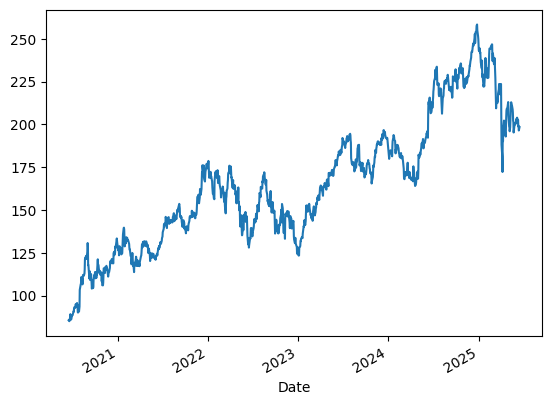

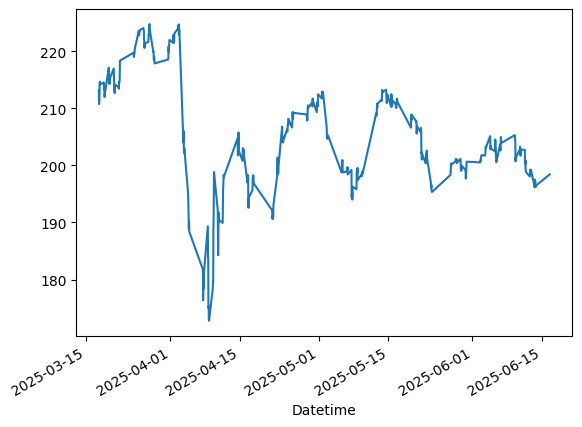

Price,close,open,high,low,volume
Date,,,,,
2020-06-16,85.561516,85.410846,85.833701,83.772912,165428800
2020-06-17,85.442459,86.307600,86.368355,85.320950,114406400
2020-06-18,85.476471,85.398704,85.894461,84.866495,96820400
2020-06-19,84.987999,86.183647,86.650236,83.877408,264476000
2020-06-22,87.211601,85.381682,87.354981,85.335508,135445200
...,...,...,...,...,...
2025-06-10,202.669998,200.600006,204.350006,200.570007,54672600
2025-06-11,198.779999,203.500000,204.500000,198.410004,60989900
2025-06-12,199.199997,199.080002,199.679993,197.360001,43904600


In [455]:
import matplotlib.pyplot as plt
%matplotlib inline

stock_data['Close'].plot()
plt.show()

recent_data['Close'].plot()
plt.show()
pd.set_option('display.max_columns', None)

from stockstats import wrap
wrapped_data = wrap(stock_data)
wrapped_data.init_all()
#print(wrapped_data)
historical_data = wrapped_data[['close','open', 'high', 'low', 'volume']]
historical_data

### News Sentiment Analysis

In [456]:
from newsapi import NewsApiClient

In [457]:
api = NewsApiClient(api_key='1727fdcffd8b4c5e936a02fa17ebb381')

In [458]:
data = api.get_everything(q=f'{stock_name}')
articles = data['articles']

# for article in articles:
#     print(article['title'])  # or article['description'], etc.


In [459]:
from langdetect import detect, DetectorFactory
english_articles = []
for article in data['articles']:
    try:
        lang = detect(article['title'] if article['title'] else article['description'])
        if lang == 'en':
            english_articles.append(article)
    except:
        continue
# english_articles

In [460]:
from datetime import datetime
articles = sorted(english_articles, key=lambda x: datetime.strptime(x['publishedAt'], "%Y-%m-%dT%H:%M:%SZ"), reverse=True)

headlines = [article['title'] for article in articles[:15]]
headlines

["Apple Explains Why iPads Don't Just Run macOS",
 'iOS 26 Adds New Zoom Setting to CarPlay',
 "Take a Break From WWDC 2025 With Apple's Chill Coffee Shop Playlist",
 'Apple Highlights Two Smaller CarPlay Changes on iOS 18.4 and iOS 26',
 'Apple to Let iPhone Users Watch Videos on CarPlay Screen While Parked',
 'WWDC 2025 Rumor Report Card: Which Leaks Were Right or Wrong?',
 "Apple Says Personalized Siri Features Shown at WWDC Last Year Were 'Real' and 'Working'",
 'WWDC 2025 Proved That Apple Learned a Valuable Lesson',
 'Snapchat announces that new lightweight AR Spectacles will be launching next year',
 'Today in Apple history: The first Apple II ships',
 'Apple Says These 13 Vehicle Brands Will Soon Offer iPhone Car Keys',
 'iOS 26 Upgrades CarPlay in Five Ways',
 'tvOS 26 is Compatible With These Apple TV Models',
 'Apple Highlights Key WWDC 2025 Announcements in Two-Minute Video',
 'Apple Says macOS Tahoe is Compatible With These Macs']

In [461]:
# from transformers import pipeline

# sentiment_pipeline = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

# full_text = " ".join(headlines)

# result = sentiment_pipeline(full_text[:512])  

# print(f"Overall Sentiment for Combined Text: {result[0]['label']}")
# print(f"Confidence: {round(result[0]['score'] * 100, 2)}%")

In [462]:
# print("Article sample timestamp:", articles[0]['publishedAt'], type(articles[0]['publishedAt']), articles[0]['publishedAt'].tzinfo)
# print("Historical index sample:", historical_data.index[0], type(historical_data.index[0]), historical_data.index.tz)


In [463]:
import pandas as pd
from transformers import pipeline

for article in articles:
    article['publishedAt'] = pd.to_datetime(article['publishedAt']).tz_convert('UTC') \
        if pd.to_datetime(article['publishedAt']).tzinfo is not None \
        else pd.to_datetime(article['publishedAt'], utc=True)

if historical_data.index.tz is None:
    historical_data.index = historical_data.index.tz_localize("UTC")

sentiment_pipeline = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")


In [464]:
sentiments = []
confidences = []
news_counts = []
weighted_scores = []

label_map = {
    "POSITIVE": 1,
    "NEUTRAL": 0,
    "NEGATIVE": -1
}

for timestamp in historical_data.index:
    relevant_news = [
        article for article in articles
        if article['publishedAt'] <= timestamp
    ]

    news_counts.append(len(relevant_news))

    if relevant_news:
        full_text = " ".join([(a['title'] or '') + ' ' + (a['description'] or '') for a in relevant_news])
        full_text = full_text[:512]
        result = sentiment_pipeline(full_text)[0]

        label = result['label'].upper()
        confidence = round(result['score'], 2)

        sentiments.append(label)
        confidences.append(confidence)
        weighted_scores.append(label_map[label] * confidence)
    else:
        sentiments.append("NEUTRAL")
        confidences.append(None)
        weighted_scores.append(0.0)

# Add columns to DataFrame
historical_data['News_Sentiment'] = sentiments
historical_data['Sentiment_Confidence'] = confidences
historical_data['Num_Relevant_News'] = news_counts
historical_data['Weighted_Sentiment'] = weighted_scores

# Preview


In [465]:
import pandas as pd

print(historical_data[['close', 'News_Sentiment', 'Sentiment_Confidence', 'Num_Relevant_News', 'Weighted_Sentiment']])

Price                           close news_sentiment  sentiment_confidence  \
Date                                                                         
2020-06-16 00:00:00+00:00   85.561516        NEUTRAL                   NaN   
2020-06-17 00:00:00+00:00   85.442459        NEUTRAL                   NaN   
2020-06-18 00:00:00+00:00   85.476471        NEUTRAL                   NaN   
2020-06-19 00:00:00+00:00   84.987999        NEUTRAL                   NaN   
2020-06-22 00:00:00+00:00   87.211601        NEUTRAL                   NaN   
...                               ...            ...                   ...   
2025-06-10 00:00:00+00:00  202.669998        NEUTRAL                  1.00   
2025-06-11 00:00:00+00:00  198.779999        NEUTRAL                  0.99   
2025-06-12 00:00:00+00:00  199.199997        NEUTRAL                  1.00   
2025-06-13 00:00:00+00:00  196.449997       POSITIVE                  0.87   
2025-06-16 00:00:00+00:00  198.434998        NEUTRAL            

<Figure size 1200x600 with 0 Axes>

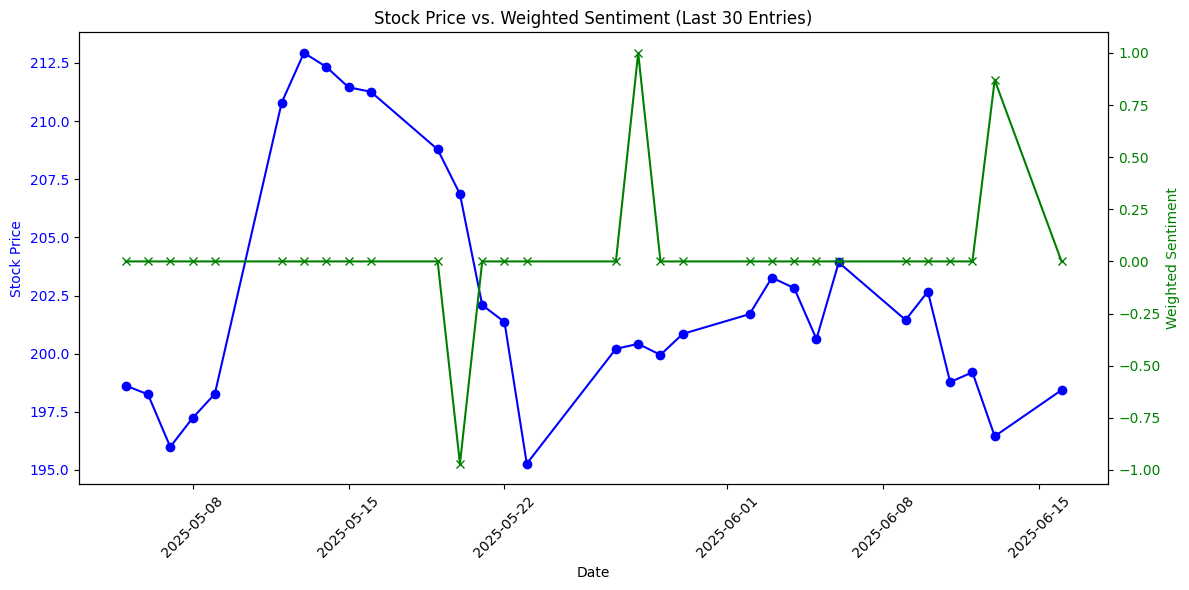

In [466]:
last_30 = historical_data.tail(30)

plt.figure(figsize=(12, 6))

# Create a twin axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stock price on primary y-axis
ax1.plot(last_30.index, last_30['close'], label='Stock Price (Close)', color='blue', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Create secondary y-axis for sentiment
ax2 = ax1.twinx()
ax2.plot(last_30.index, last_30['Weighted_Sentiment'], label='Weighted Sentiment', color='green', marker='x')
ax2.set_ylabel('Weighted Sentiment', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and layout
plt.title('Stock Price vs. Weighted Sentiment (Last 30 Entries)')
fig.tight_layout()
plt.show()


### Making the data

In [467]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

mid_prices = ((historical_data['high'] + historical_data['low']) / 2).interpolate().values
split_index = int(len(mid_prices) * 0.8)
train_raw = mid_prices[:split_index]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_raw.reshape(-1, 1)).flatten()
original_train=train_scaled.copy()
window_size = 100
N = len(train_scaled)

std_avg_predictions = []
mse_errors = []
std_avg_dates = []

for i in range(window_size, N):
    prediction = np.mean(train_scaled[i - window_size:i])
    std_avg_predictions.append(prediction)

    mse_errors.append((prediction - train_scaled[i]) ** 2)

    if i < len(historical_data):
        date = historical_data.index[i]
    else:
        last_date = pd.to_datetime(historical_data.index[-1])
        date = last_date + dt.timedelta(days=i - len(historical_data) + 1)
    std_avg_dates.append(date)

predictions_actual = scaler.inverse_transform(np.array(std_avg_predictions).reshape(-1, 1)).flatten()
true_actual = scaler.inverse_transform(train_scaled[window_size:].reshape(-1, 1)).flatten()

mse_actual = 0.5 * np.mean((predictions_actual - true_actual) ** 2)
print(f"MSE in actual price scale: {mse_actual:.2f}")


MSE in actual price scale: 76.89


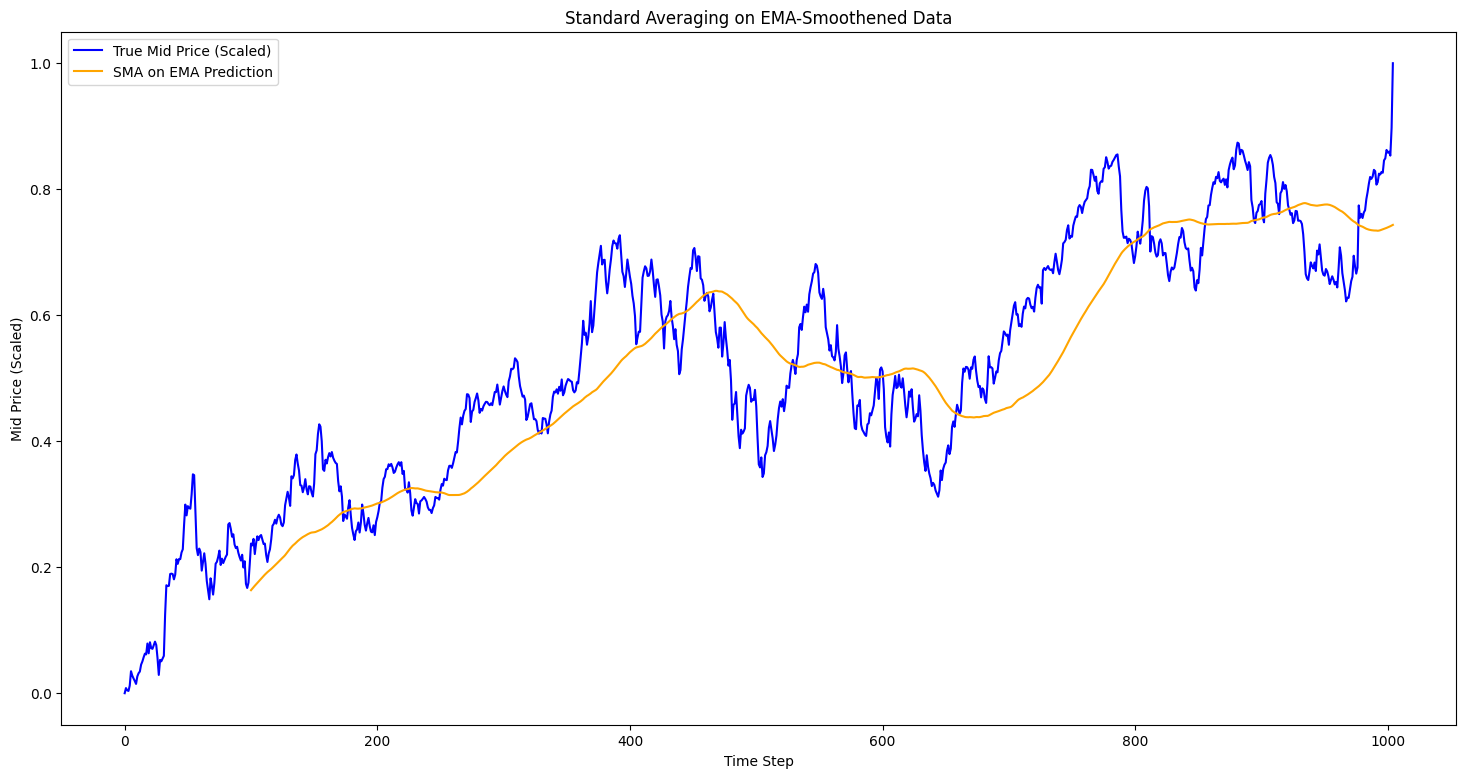

In [468]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))
plt.plot(original_train, label='True Mid Price (Scaled)', color='blue')
plt.plot(range(window_size, len(original_train)), std_avg_predictions, label='SMA on EMA Prediction', color='orange')
plt.xlabel('Time Step')
plt.ylabel('Mid Price (Scaled)')
plt.title('Standard Averaging on EMA-Smoothened Data')
plt.legend()
plt.show()


In [469]:
N = len(train_scaled)
decay = 0.5

run_avg_predictions = []
run_avg_dates = []
mse_errors = []

running_mean = train_scaled[0]
run_avg_predictions.append(running_mean)

for i in range(1, N):
    running_mean = running_mean * decay + (1.0 - decay) * train_scaled[i - 1]
    run_avg_predictions.append(running_mean)

    if i < len(historical_data):
        date = historical_data.index[i]
    else:
        last_date = pd.to_datetime(historical_data.index[-1])
        date = last_date + dt.timedelta(days=i - len(historical_data) + 1)
    run_avg_dates.append(date)

predictions_actual = scaler.inverse_transform(np.array(run_avg_predictions[1:]).reshape(-1, 1)).flatten()
true_actual = scaler.inverse_transform(train_scaled[1:].reshape(-1, 1)).flatten()

mse_actual = 0.5 * np.mean((predictions_actual - true_actual) ** 2)
print(f"MSE error for EMA averaging : {mse_actual:.2f}")

MSE error for EMA averaging : 3.96


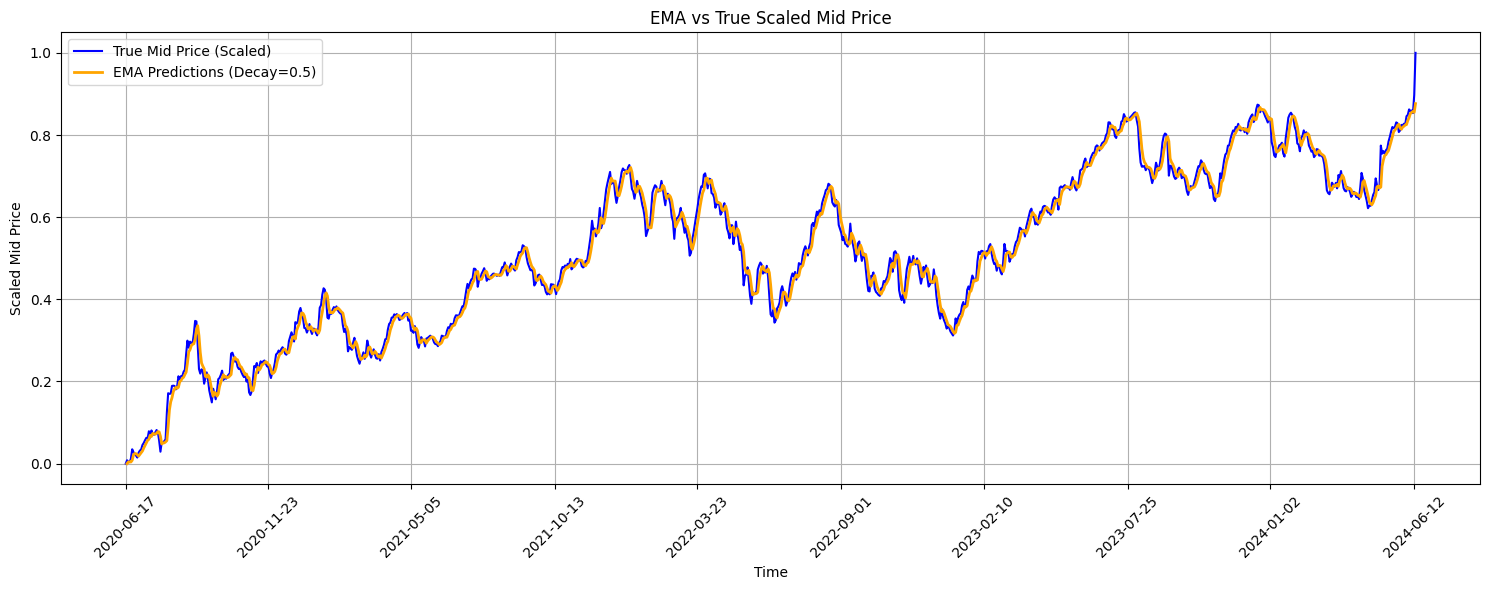

In [470]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.plot(train_scaled, label='True Mid Price (Scaled)', color='blue', linewidth=1.5)

plt.plot(range(1, len(run_avg_predictions)), run_avg_predictions[1:], 
         label='EMA Predictions (Decay=0.5)', color='orange', linewidth=2)

if len(run_avg_dates) == len(run_avg_predictions) - 1:
    plt.xticks(ticks=np.linspace(0, len(run_avg_dates)-1, 10, dtype=int), 
               labels=[run_avg_dates[i].strftime('%Y-%m-%d') for i in np.linspace(0, len(run_avg_dates)-1, 10, dtype=int)],
               rotation=45)

plt.title('EMA vs True Scaled Mid Price')
plt.xlabel('Time')
plt.ylabel('Scaled Mid Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [471]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [472]:
features = historical_data[['open', 'high', 'low', 'volume','Weighted_Sentiment']].values
target = historical_data[['close']].values

train_size = int(len(features) * 0.8)
X_train_raw, X_test_raw = features[:train_size], features[train_size:]
y_train_raw, y_test_raw = target[:train_size], target[train_size:]


In [473]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

y_train_scaled = scaler_y.fit_transform(y_train_raw)
y_test_scaled = scaler_y.transform(y_test_raw)


In [474]:
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(window_size, len(X)):
        X_seq.append(X[i - window_size:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

window_size = 60
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, window_size)
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\akshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

In [475]:
history = model.fit(X_train_seq, y_train_seq, epochs=18, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)


Epoch 1/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0519 - val_loss: 0.0146
Epoch 2/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0023 - val_loss: 0.0112
Epoch 3/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016 - val_loss: 0.0099
Epoch 4/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014 - val_loss: 0.0084
Epoch 5/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013 - val_loss: 0.0063
Epoch 6/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 7/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014 - val_loss: 0.0053
Epoch 8/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 9/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 10/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 11/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 12/18
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

In [476]:
predicted_scaled = model.predict(X_test_seq)
predicted = scaler_y.inverse_transform(predicted_scaled)
y_true = scaler_y.inverse_transform(y_test_seq)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


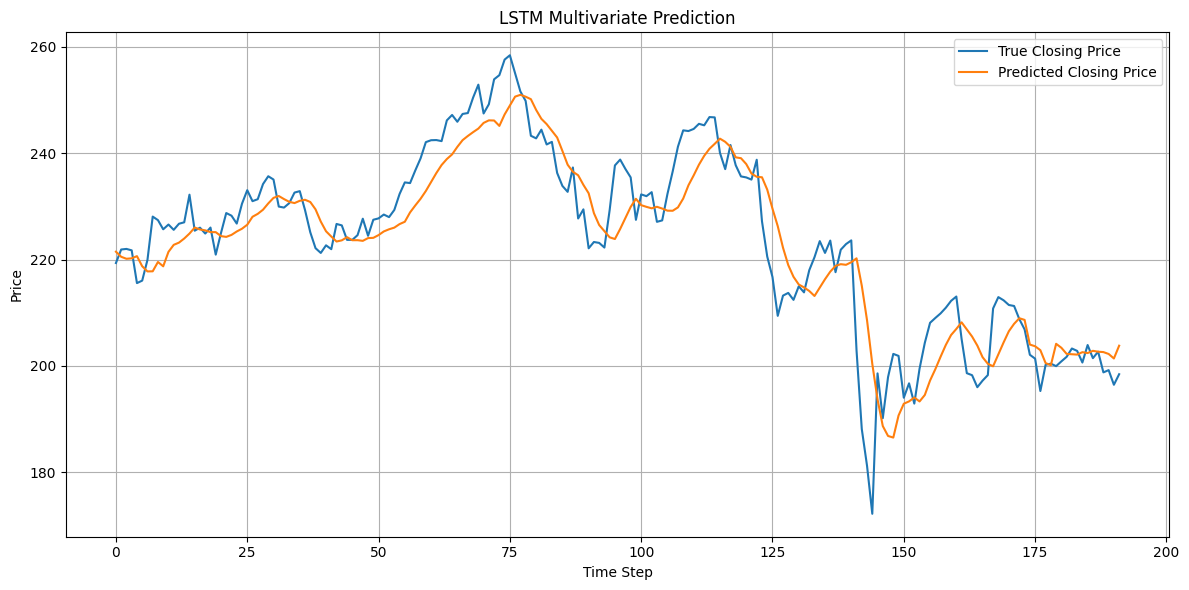

In [477]:
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='True Closing Price')
plt.plot(predicted, label='Predicted Closing Price')
plt.title('LSTM Multivariate Prediction')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [478]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, predicted)
print(f"MSE between y_true and predicted: {mse:.5f}")


MSE between y_true and predicted: 47.29274
